<a href="https://colab.research.google.com/github/VictorHRRios/tex-mex-tipo/blob/main/Tipo_de_Lugar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importando Librerias

In [190]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import spacy
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Bibliotecas para manipulación y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import time
from sklearn.metrics import f1_score

# Modelos y herramientas de Sklearn
from sklearn.svm import SVR
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [191]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Importando el dataset

In [192]:
url = "https://raw.githubusercontent.com/gmauricio-toledo/NLP-LCC/main/Rest-Mex/Rest-Mex_2025_train.csv"
df = pd.read_csv(url)
df.head()

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


In [193]:
df2 = df[['Title','Review','Region','Type']]
df2

,Title,Review,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,Michoacan,Hotel
...,...,...,...,...
208046,"excelente ambiente, comida y atencion","Excelente Restaurante, comida Mexicana de alto...",Queretaro,Restaurant
208047,Muy mal servicio,Estuvimos allí como huéspedes de un día a la p...,QuintanaRoo,Hotel
208048,Excelente,"Excelente comida, así como la atención y servi...",Estado_de_Mexico,Restaurant
208049,Visita nocturna,Nos toco visitar este sitio cuando ya había ca...,Chihuahua,Attractive


# 2. Explorando el dataset

## 2.0 Generalizaciones

In [194]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208051 entries, 0 to 208050
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Title   208049 non-null  object
 1   Review  208051 non-null  object
 2   Region  208051 non-null  object
 3   Type    208051 non-null  object
dtypes: object(4)
memory usage: 6.3+ MB


Son 200,000 datos todos del tipo objeto

## 2.1 Valores nulos y duplicados

In [195]:
print("Valores nulos\n", df2.isna().sum())

Valores nulos
 Title     2
Review    0
Region    0
Type      0
dtype: int64


In [196]:
print("Valores repetidos\n", df2.duplicated(keep=False).sum())

Valores repetidos
 356


In [197]:
print("Entradas repetidas de las reviews\n",
      df2['Review'].duplicated(keep=False).sum())

Entradas repetidas de las reviews
 417


In [198]:
print("Entradas repetidas de todo el dataset\n",
      df2.duplicated(keep=False).sum())

Entradas repetidas de todo el dataset
 356


In [199]:
print("Entradas repetidas de las reviews que no estan en todo el dataset:",
      df2['Review'].duplicated(
          keep=False).sum() - df2.duplicated(keep=False).sum())

Entradas repetidas de las reviews que no estan en todo el dataset: 61


Nota: Aquí se puede ver que es diferente el número de repetidos de todo el df y de la columna de Review

In [200]:
df_dup = df2[df2.duplicated(keep=False)]

In [201]:
df_review_dup = df2[df2['Review'].duplicated(keep=False)]

In [202]:
indexes = df_review_dup.index

In [203]:
outliers_dup_ind = indexes.difference(df_dup.index)

In [204]:
df2[df2.index.isin(outliers_dup_ind)].sort_values('Review').head(9)

,Title,Review,Region,Type
200112,Vacaciones con mi mamita,Un lugar emblemático recomendable histórico q...,Chiapas,Attractive
31032,Acciones con mi Mamita,Un lugar emblemático recomendable histórico q...,Chiapas,Attractive
204392,Deben pasar un día aquí si vuelas a Ciudad de ...,"Absolutamente impresionante pieza de historia,...",Estado_de_Mexico,Attractive
112640,Absolutamente impresionante.,"Absolutamente impresionante pieza de historia,...",Estado_de_Mexico,Attractive
106781,Bonita y relajante de las aguas,"Agua clara, tranquila, relajante, piscina Ceno...",QuintanaRoo,Attractive
183460,Camas individuales en México Cenotes,"Agua clara, tranquila, relajante, piscina Ceno...",QuintanaRoo,Attractive
179077,En un Cenote Flower Garden,"Agua clara, tranquila, relajante, piscina Ceno...",QuintanaRoo,Attractive
26311,PESIMO,Anteriormente ya habíamos estado allí en parej...,Jalisco,Restaurant
152636,PÉSIMO,Anteriormente ya habíamos estado allí en parej...,Jalisco,Restaurant


Por lo que es importante que eliminemos duplicados en base a la Review

## 2.2 Distribución de los datos

In [205]:
df2['Type'].unique()

array(['Restaurant', 'Attractive', 'Hotel'], dtype=object)

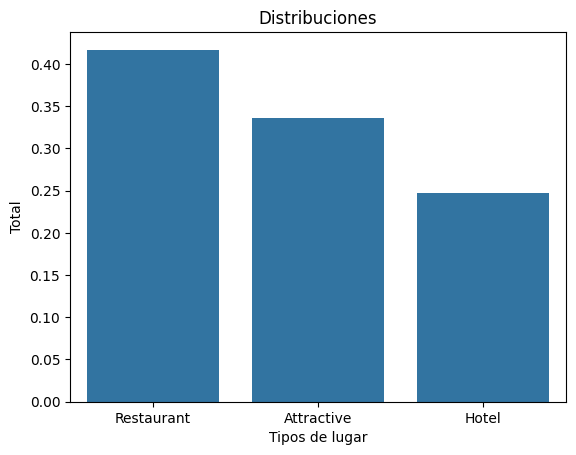

In [206]:
sns.countplot(x=df2['Type'], stat='probability')
plt.title('Distribuciones')
plt.xlabel('Tipos de lugar')
plt.ylabel('Total')
plt.show()

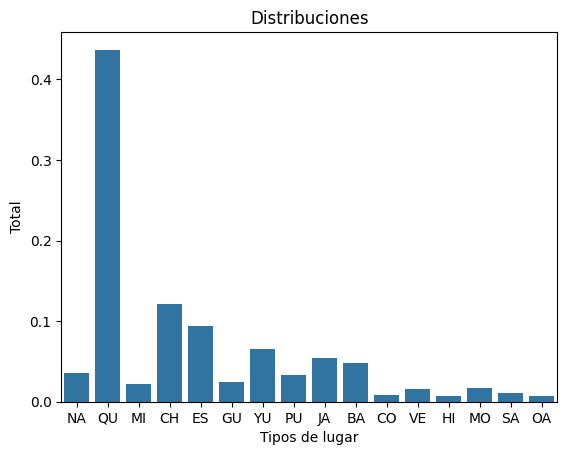

In [207]:
sns.countplot(x=df2['Region'].apply(lambda x: x[:2].upper()), stat='probability')
plt.title('Distribuciones')
plt.xlabel('Tipos de lugar')
plt.ylabel('Total')
plt.show()

In [208]:
review_length = df2['Review'].apply(lambda x: len(x.split()))

In [209]:
title_length = df2['Title'].astype(str).apply(lambda x: len(x.split()))

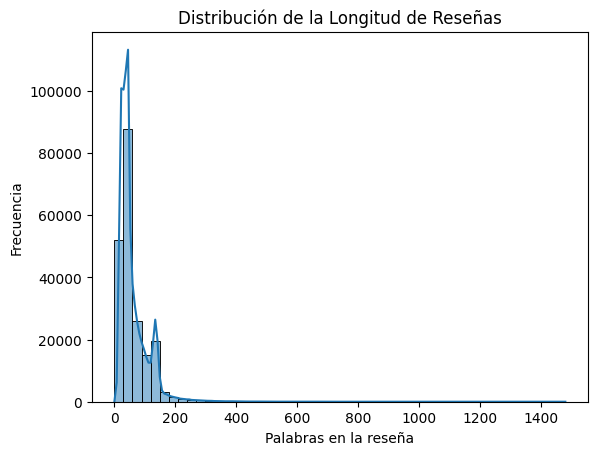

In [210]:
sns.histplot(review_length, bins=50, kde=True)
plt.title('Distribución de la Longitud de Reseñas')
plt.xlabel('Palabras en la reseña')
plt.ylabel('Frecuencia')
plt.show()

>**TODO**: Hacer algo con el hecho de que hay reseñas muy pequeñas

Text(0, 0.5, 'Frecuencia')

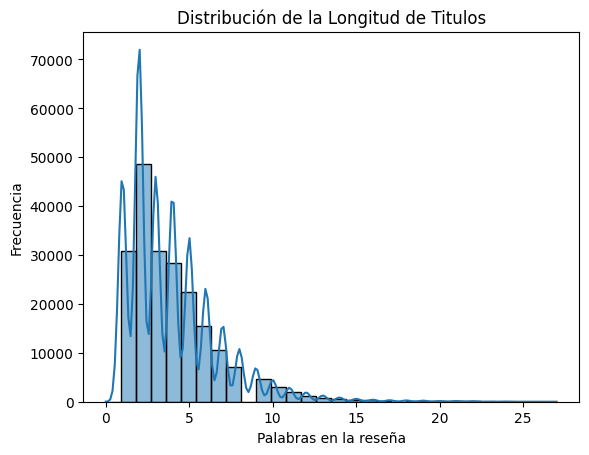

In [211]:
sns.histplot(title_length, bins=30, kde=True)
plt.title('Distribución de la Longitud de Titulos')
plt.xlabel('Palabras en la reseña')
plt.ylabel('Frecuencia')

# 3. Preprocesar

In [212]:
features = df2.drop('Type', axis=1)
target = df2['Type']

In [213]:
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2, stratify=target, random_state=64)

## 3.0 Convertir a string

In [214]:
X_train = X_train.map(str)

## 3.1 Tratar los valores nulos y duplicados

In [215]:
X_train.loc[:, 'Title'] = X_train['Title'].fillna(' ')

In [216]:
X_train.loc[:, 'Review'] = X_train['Review'].drop_duplicates(keep='last')

In [217]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

## 3.2 Tratar el titulo y las reviews como una columna

In [218]:
X_train.insert(loc=2, column='Text', value=X_train['Title'] + ' ' + X_train['Review'])

In [219]:
str(X_train[['Review']].iloc[18])

'Review    Playa Norte fue nuestra Ãºltima parada en el v...\nName: 88923, dtype: object'

In [220]:
str(X_train[['Review']].iloc[18]).encode('latin-1').decode()

'Review    Playa Norte fue nuestra última parada en el v...\nName: 88923, dtype: object'

## 3.3 Tratar valores mal codificados

In [221]:
def codificar_decodificar_latin(string):
    global posibles_errores
    try:
        new_string = string.encode('latin-1').decode('utf-8')
        posibles_errores +=1
        before_after.append((string, new_string))
        return new_string
    except UnicodeDecodeError as e: # Si no se pudo decodificar del latin, es decir que no esta mal formateado para este encoding
        return string

In [222]:
before_after = []
posibles_errores = 0

In [223]:
X_train['Text'] = X_train['Text'].apply(codificar_decodificar_latin)

In [224]:
posibles_errores

18451

In [225]:
before_after[:2]

[('Buena playa, soleado y lleno Playa Norte fue nuestra Ãºltima parada en el viaje de un dÃ\xada a Isla Mujeres. Llegamos a la playa, a 45 minutos antes del atardecer y estaba muy lleno. Creo que la isla era probablemente bastante lleno el dÃ\xada que fuimos ya que se acabaron los carros de golf y acabamos alquilando una moto en su lugar. HabÃ\xada unas vistas preciosas de la playa y podÃ\xadamos ver la puesta de sol sobre el mar. El agua estaba bastante tranquilo y vimos un montÃ³n de gente nadando allÃ\xad. El agua era de un color turquesa claro y habÃ\xada comida y bebidas disponibles a pedido. Alquilamos sillas de playa, pedimos una piÃ±a colada que encontramos era caro pero no gusto. No estoy seguro sobre la comida, ya que no eran lo suficiente para pedir comida. Es un hermoso, lugar muy popular para pasar unas horas.',
  'Buena playa, soleado y lleno Playa Norte fue nuestra última parada en el viaje de un día a Isla Mujeres. Llegamos a la playa, a 45 minutos antes del atardecer y

> En estos dos ejemplos hay uno que si ayudó, y en el otro no. Esto es porque el segundo texto no tiene "caracteres especiales" como acentos, signos, etc..., por lo que se pudo decodificar del latín sin problemas

## 3.4 Convertir a minusculas

In [226]:
X_train['Text'] = X_train['Text'].apply(lambda entry: entry.lower())

## 3.5 Tokenizar

In [227]:
nlp = spacy.blank(name='es')

In [228]:
tokenized_X_train = [[t.text for t in tok_doc if
          not t.is_punct and \
          not t.is_space and \
          t.is_alpha] for tok_doc in nlp.pipe(X_train['Text']) ]


In [229]:
print(len(tokenized_X_train))
print(y_train.shape)

166302
(166302,)


In [230]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.extend(['\n', '\b', 'si'])

In [231]:
tokenized_X_train = [[w for w in doc if w not in stopwords] for doc in tokenized_X_train]

In [232]:
docs_train = [" ".join(doc) for doc in tokenized_X_train]

In [233]:
wc = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
wordcloud = wc.generate(' '.join(docs_train[:100000]))

In [234]:
print(wordcloud.words_.keys())

dict_keys(['restaurante', 'vale pena', 'hotel', 'así', 'mejor', 'increíble', 'bueno', 'solo', 'aunque', 'excelente servicio', 'delicioso', 'sólo', 'día', 'buena comida', 'zona', 'habitación', 'noche', 'además', 'tulum', 'gran', 'tiempo', 'desayuno', 'personal amable', 'recomiendo', 'bien', 'realmente', 'méxico', 'cenote', 'guía', 'excelente lugar', 'siempre', 'impresionante', 'sitio', 'comida deliciosa', 'persona', 'embargo', 'gente', 'mundo', 'ma', 'comida buena', 'encantó', 'playa', 'genial', 'visita', 'ciudad', 'buen servicio', 'grande', 'familia', 'ver', 'isla mujere', 'incluso', 'maravilloso', 'recomendable', 'diferente', 'especial', 'experiencia', 'casa', 'gusto', 'viaje', 'cena', 'verdad', 'agradable', 'entrada', 'habitacione', 'meno', 'mesa', 'aquí', 'hermoso', 'excelente comida', 'bebida', 'creo', 'toda', 'isla', 'cuenta', 'duda', 'servicio excelente', 'después', 'menú', 'allí', 'amigo', 'interesante', 'buen lugar', 'pequeño', 'rico', 'tour', 'agua', 'complejo', 'mismo', 'va',

# 4. Modelos

In [235]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso

In [236]:
rfc = RandomForestClassifier(random_state=9)
logreg = LogisticRegression(random_state=9)
gbc = GradientBoostingClassifier(random_state=9)
svc = SVC(probability=True, random_state=9)
lasso_clf = LogisticRegression(penalty='l1', solver='saga', random_state=9)

## 4.1 Busqueda Inicial del mejor modelo

In [237]:
# Probar en ocotillo
models = {
    "Logistic Regression": logreg,
    "Random Forest": rfc, #Probar en ocotillo
    "SVM": svc, #Probar en ocotillo
    "Lasso": lasso_clf,
    "Gradient Boosting": gbc, #Probar en ocotillo
}

In [238]:
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_bow = bow_vectorizer.fit_transform(docs_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(docs_train)

vectorizers = {
    "tfidf" : X_train_bow,
    "bow" : X_train_tfidf,
    ### Agregar mas
}

In [239]:
from sklearn.model_selection import cross_val_score

scores = []

for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, model in models.items():
        start_time = time.time()

        X_train_vectorized = vectorizer
        score = cross_val_score(model, X_train_vectorized[:1000], y_train[:1000], scoring='f1_weighted', cv=5) # Cambiar esto si estas en el ocotillo
        mean_score = score.mean()
        scores.append((vectorizer_name, model_name, mean_score))

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"{vectorizer_name}, {model_name} : done in {elapsed_time:.2f} seconds")

tfidf, Logistic Regression : done in 10.07 seconds
tfidf, Random Forest : done in 24.89 seconds
tfidf, SVM : done in 6.96 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


tfidf, Lasso : done in 3.63 seconds
tfidf, Gradient Boosting : done in 69.59 seconds
bow, Logistic Regression : done in 8.68 seconds
bow, Random Forest : done in 22.33 seconds
bow, SVM : done in 8.05 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


bow, Lasso : done in 2.06 seconds
bow, Gradient Boosting : done in 77.71 seconds


In [240]:
scores

[('tfidf', 'Logistic Regression', 0.8730469058433284),
 ('tfidf', 'Random Forest', 0.7742681487524493),
 ('tfidf', 'SVM', 0.8399577363240882),
 ('tfidf', 'Lasso', 0.8671599149213802),
 ('tfidf', 'Gradient Boosting', 0.841966931154724),
 ('bow', 'Logistic Regression', 0.8662788694828407),
 ('bow', 'Random Forest', 0.810045191232119),
 ('bow', 'SVM', 0.8522641278546722),
 ('bow', 'Lasso', 0.8050921784425957),
 ('bow', 'Gradient Boosting', 0.8596350971366971)]

## 4.2 Metodo de busqueda

In [241]:
# Ejemplo de un param_grid *CAMBIAR*
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}

In [242]:
# Configuración del RandomizedSearchCV cambiar segun el mejor modelo seleccionado en 4.1
random_search = RandomizedSearchCV(
    lasso_clf,
    param_distributions=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1_weighted',
)

random_search.fit(X_train_tfidf[:1000], y_train[:1000]) # Cambiar esto si estas en el ocotillo

results = pd.DataFrame(random_search.cv_results_)
results.to_csv('results.csv', index=False)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'tol': 0.01, 'max_iter': 100, 'C': 10}
Best Score: 0.8823150263185386


In [243]:
best_estimator = random_search.best_estimator_

# 5. Con el Test

> TODO: Meter todo esto en un pipeline?

In [244]:
X_test = X_test.map(str)

In [245]:
X_test.loc[:, 'Title'] = X_test['Title'].fillna(' ')

In [246]:
X_test.loc[:, 'Review'] = X_test['Review'].drop_duplicates(keep='last')

In [247]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [248]:
X_test.insert(loc=2, column='Text', value=X_test['Title'] + ' ' + X_test['Review'])

In [249]:
before_after = []
posibles_errores = 0

In [250]:
X_test['Text'] = X_test['Text'].apply(codificar_decodificar_latin)

In [251]:
X_test['Text'] = X_test['Text'].apply(lambda entry: entry.lower())

In [252]:
tokenized_X_test = [[t.text for t in tok_doc if
          not t.is_punct and \
          not t.is_space and \
          t.is_alpha] for tok_doc in nlp.pipe(X_test['Text']) ]

In [253]:
tokenized_X_test = [[w for w in doc if w not in stopwords] for doc in tokenized_X_test]

In [254]:
docs_test = [" ".join(doc) for doc in tokenized_X_test]

In [255]:
X_test_bow = bow_vectorizer.transform(docs_test)
X_test_tfidf = tfidf_vectorizer.transform(docs_test)

In [256]:
predictions = best_estimator.predict(X_test_tfidf)

In [257]:
f1_score_avg = f1_score(y_test, predictions, average='weighted')
print("Test Cohen's Kappa Score:", f1_score_avg)

Test Cohen's Kappa Score: 0.8931499997287287
